In [2]:
from gensim.models.word2vec import Word2Vec
import pretty_midi
import glob
import pandas as pd

In [15]:
# MIDI dosyalarının konumlarını almak.
training_midi_files = glob.glob("C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\*.mid")

In [16]:
training_midi_files # MIDIS to Train.

['C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Ajde Jano.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Amavolovolo.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Ben Annemi İsterim.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Carol of the Bells - k.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Come and See the Baby Koro.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Dağlarda Kar Sesi Var.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\domdomkoro.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Mecburen TTBB.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\Tourdion koro.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_files\\trilogykoro.mid',
 'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V\\midi_fi

Each MIDI file has different track pattern and we only need to extract and train Soprano, Alto, Tenor, Bass tracks of midi files. (We don't need drum or other supplemental tracks.)

So I define a dictionary to define tracks that which we need to extract from each MIDI:

In [17]:
# number of midi : tracks to extract
satb_tracks = {
    "1" : [1,2,3, 4],
    "2" : [1,2,3, 4],
    "3" : [1,2,3, 4],
    "4" : [1,2,3, 4],
    "5" : [2,3,4, 5],
    "6" : [2,4,6,8],
    #"6-2" : [3, 5, 7, 9],
    "7" : [1,2,3,4],
    "8" : [1,2,3,4],
    "9" : [1,2,3,4],
    "10": [1,2,3,4],
    "11": [2,3,4,5],
    "12": [1,2,3,4],
    "13": [3,4,5,6]
}

In [18]:
# Midi dosyalarını PrettyMIDI formatına çevirmek.
midis = list()
for midi in training_midi_files:
    midis.append(pretty_midi.PrettyMIDI(midi))

c:\users\gunay.eser\python\python36\lib\site-packages\pretty_midi\pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


In [19]:
# Notaların başlangıç ve bitiş saniyeleri arasındaki süreler.
intervals = list()
for i in midis[8].instruments[0].notes:
    #print(i.pitch)
    #intervals.append(round(i.end - i.start, 2))
    intervals.append(i.get_duration())
set(intervals)

{0.28500998958332957,
 0.2850099895833367,
 0.2850099895833438,
 0.285009989583358,
 0.5706149895833263,
 0.5706149895833335,
 0.8562199895833231,
 0.8562199895833302,
 0.8562199895833373,
 1.1418249895833128,
 1.141824989583327,
 1.1418249895833341,
 1.1418249895833412,
 1.7130349895833206,
 1.7130349895833348,
 1.713034989583349}

In [20]:
interval_mean = dict()
for i in midis:
    for j in i.instruments[0].notes:
        interval = round(j.end - j.start, 2)
        if interval in interval_mean.keys():
            interval_mean[interval] += 1
        else:
            interval_mean[interval] = 1

In [21]:
{k: v for k, v in sorted(interval_mean.items(), key=lambda item: item[1], reverse= True)}

{0.29: 378,
 0.25: 347,
 0.28: 243,
 0.3: 224,
 0.39: 202,
 0.5: 185,
 0.2: 150,
 0.34: 148,
 0.14: 141,
 0.6: 81,
 0.45: 74,
 0.17: 56,
 0.57: 56,
 0.32: 54,
 0.44: 52,
 0.37: 49,
 0.65: 49,
 0.55: 47,
 0.58: 40,
 0.9: 30,
 0.67: 26,
 0.36: 23,
 0.86: 18,
 0.73: 16,
 1.35: 16,
 0.22: 16,
 2.1: 15,
 0.43: 15,
 0.59: 14,
 1.14: 14,
 1.38: 12,
 2.04: 12,
 1.0: 12,
 1.39: 11,
 0.79: 10,
 1.71: 10,
 0.89: 10,
 1.2: 8,
 1.11: 8,
 1.5: 6,
 0.75: 6,
 0.68: 6,
 2.5: 6,
 0.83: 6,
 0.91: 5,
 4.2: 4,
 0.99: 4,
 2.37: 4,
 1.02: 4,
 0.51: 4,
 0.98: 4,
 1.1: 3,
 0.18: 3,
 1.94: 3,
 1.82: 3,
 2.19: 2,
 2.71: 2,
 2.31: 2,
 1.34: 2,
 1.36: 2,
 2.7: 1,
 2.4: 1,
 3.6: 1,
 6.0: 1,
 2.0: 1,
 1.73: 1,
 2.59: 1,
 7.27: 1}

In [43]:
90 / 0.15

600.0

In [39]:
14278*6.66/

633943.2

In [32]:
midis[0].instruments[0].notes

[Note(start=0.000000, end=0.598750, pitch=65, velocity=80),
 Note(start=0.600000, end=0.898750, pitch=64, velocity=80),
 Note(start=0.900000, end=1.198750, pitch=62, velocity=80),
 Note(start=1.200000, end=1.498750, pitch=64, velocity=80),
 Note(start=1.500000, end=2.098750, pitch=65, velocity=80),
 Note(start=2.100000, end=2.398750, pitch=65, velocity=80),
 Note(start=2.400000, end=2.698750, pitch=65, velocity=80),
 Note(start=2.700000, end=2.998750, pitch=64, velocity=80),
 Note(start=3.000000, end=3.298750, pitch=64, velocity=80),
 Note(start=3.300000, end=3.598750, pitch=62, velocity=80),
 Note(start=3.600000, end=4.198750, pitch=62, velocity=80),
 Note(start=4.200000, end=4.798750, pitch=62, velocity=80),
 Note(start=4.800000, end=5.098750, pitch=60, velocity=80),
 Note(start=5.100000, end=7.798750, pitch=60, velocity=80),
 Note(start=8.400000, end=8.998750, pitch=65, velocity=80),
 Note(start=9.000000, end=9.298750, pitch=67, velocity=80),
 Note(start=9.300000, end=9.898750, pitc

In [44]:
pd.DataFrame(midis[0].instruments[0].get_piano_roll())

,0,1,2,3,4,5,6,7,8,9,...,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [911]:
def get_song_df(satb_tracks, midis):
    song_list = list()
    for i in satb_tracks.keys():
        print("Song {}:".format(i))
        current_midi = midis[int(i)-1]
        instrument_rolls = dict()
        song = {"instrument_1":[],
            "instrument_2":[],
            "instrument_3":[],
            "instrument_4":[]
           }
        
        print("Piano roll alınıp transpose ediliyor...")
        for j in range(4):
            #print("Checking for {}'th track".format(j))
            instrument_rolls["instrument_{}".format(j+1)] = pd.DataFrame(current_midi.instruments[satb_tracks[i][j]-1].get_piano_roll(fs=6.66)).transpose()

        print("Piano roll transpose işlemi tamamlandı...")
        
        print("En kısa uzunluklu piano roll bulunuyor..")
        a = list()
        for y in range(4):
            a.append(instrument_rolls[f"instrument_{y+1}"].shape[0])
        shortest = min(a)
        print("En kısa track uzunluğu : {}".format(shortest))
        
        print("Notalar alınıp song_df oluşturulmaya başlanıyor...")
        
        
        for z in range(shortest):  # Minimum uzunluklu roll alınacak.
            #print("Time {}".format(z))
            for k in list(instrument_rolls.keys()):
                #print("Track {}".format(k))
                pitch = instrument_rolls[k].iloc[[z]].values[0].argmax()
                velocity = instrument_rolls[k].iloc[[z]].values[0].max()
                #print(pitch , type(pitch))
                song[k].append(str(pitch) + "-" + "{}".format(k.split("_")[1]) + "-" + str(int(velocity)))
        song_df = pd.DataFrame(song)
        padding_row = {"instrument_1" : '0-1-80' , "instrument_2" : "0-2-80" , "instrument_3" : "0-3-80" , "instrument_4" : "0-4-80"}
        for i in range(5):
            song_df = song_df.append(padding_row, ignore_index = True)
        print("{}'th şarkı tamamlandı..".format(i))
        song_list.append(song_df)
    
    song_dfs = list()
    for i in song_list:
        for j in i.values:
            song_dfs.append( list(j.astype(str)))
    return song_dfs, song_list

song_dfs, song_list = get_song_df(satb_tracks, midis)


Song 1:
Piano roll alınıp transpose ediliyor...
Piano roll transpose işlemi tamamlandı...
En kısa uzunluklu piano roll bulunuyor..
En kısa track uzunluğu : 951
Notalar alınıp song_df oluşturulmaya başlanıyor...
4'th şarkı tamamlandı..
Song 2:
Piano roll alınıp transpose ediliyor...
Piano roll transpose işlemi tamamlandı...
En kısa uzunluklu piano roll bulunuyor..
En kısa track uzunluğu : 807
Notalar alınıp song_df oluşturulmaya başlanıyor...
4'th şarkı tamamlandı..
Song 3:
Piano roll alınıp transpose ediliyor...
Piano roll transpose işlemi tamamlandı...
En kısa uzunluklu piano roll bulunuyor..
En kısa track uzunluğu : 1027
Notalar alınıp song_df oluşturulmaya başlanıyor...
4'th şarkı tamamlandı..
Song 4:
Piano roll alınıp transpose ediliyor...
Piano roll transpose işlemi tamamlandı...
En kısa uzunluklu piano roll bulunuyor..
En kısa track uzunluğu : 679
Notalar alınıp song_df oluşturulmaya başlanıyor...
4'th şarkı tamamlandı..
Song 5:
Piano roll alınıp transpose ediliyor...
Piano roll 

In [912]:
song_list[2]

,instrument_1,instrument_2,instrument_3,instrument_4
0,74-1-80,71-2-80,67-3-80,62-4-80
1,74-1-80,71-2-80,67-3-80,62-4-80
2,74-1-80,71-2-80,67-3-80,62-4-80
3,74-1-80,71-2-80,67-3-80,65-4-80
4,74-1-80,71-2-80,67-3-80,65-4-80
5,74-1-80,71-2-80,67-3-80,62-4-80
6,74-1-80,71-2-80,67-3-80,62-4-80
7,74-1-80,71-2-80,65-3-80,60-4-80
8,74-1-80,71-2-80,65-3-80,60-4-80
9,74-1-80,71-2-80,67-3-80,62-4-80


In [790]:
# Add empty lines between songs

"""padding_row = {"instrument_1" : '0-1-80' , "instrument_2" : "0-2-80" , "instrument_3" : "0-3-80" , "instrument_4" : "0-4-80"}
for i in song_list:
    for j in range(5):
        i = i.append(padding_row, ignore_index = True)"""

In [913]:
def make_chords_words(song_list):
    song_chords_words = list()
    for i in song_list:
        chords = list()
        for index, row in i.iterrows():
            chords.append(row.instrument_1 + "|" +row.instrument_2 + "|" + row.instrument_3 + "|" + row.instrument_4)
        x = pd.DataFrame(chords, columns=["chords"])
        song_chords_words.append(x)
    return song_chords_words

In [914]:
chords_song_list = make_chords_words(song_list)

In [915]:
song_dfs = list()
for i in chords_song_list:
    for j in i.values:
        song_dfs.append( " ".join(j.astype(str)))

In [916]:
corpus = list()
count = 1

tmp = list()
for i in range(len(song_dfs)):
    if i%10 == 0 :
        corpus.append(tmp)
        tmp = list()
    tmp.append(song_dfs[i])
    i += 1
    
corpus.pop(0)

[]

In [878]:
song_dfs

['65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '65-1-80|65-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '64-1-80|64-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|57-3-80|50-4-80',
 '62-1-80|62-2-80|55-3-80|48

In [917]:
corpus

[['65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80'],
 ['65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '65-1-80|65-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80',
  '64-1-80|64-2-80|57-3-80|50-4-80'],
 ['64-1-80|64-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',
  '62-1-80|62-2-80|57-3-80|50-4-80',

In [ ]:
"""corpus = list()

with tqdm(total = len(song_list)) as pbar:
    for i in song_list:
        count = 1
        sentences = list()
        while count != int(len(i.chords)/10):
            sentences.append(" ".join(i.chords[count*10 - 10 : count*10]))
        pbar.update(1)
        
    
corpus.append(sentences)"""

**Pickle'ing the trainable song_dataset:**

In [42]:
import pickle
with open("trainable_song_data.pkl" ,'wb') as f:
    pickle.dump(song_list, f)

In [41]:
# Code to read it
import pickle
with open('trainable_song_data.pkl', 'rb') as f:
    song_list = pickle.load(f)

In [803]:
len(song_dfs)

7437

In [918]:
# Create CBOW model 
import gensim
model1 = gensim.models.Word2Vec(corpus, min_count = 1,  
                              size = 70, window = 10)

In [919]:
pretrained_weights = model1.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)
print('Checking similar words:')
for word in ['67-1-80|64-2-80|55-3-80|48-4-80']:
    most_similar = ', '.join('%s (%.2f)' % (similar, dist) 
                           for similar, dist in model1.most_similar(word)[:8])
    print('  %s -> %s' % (word, most_similar))

c:\users\gunay.eser\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


Result embedding shape: (700, 70)
Checking similar words:


c:\users\gunay.eser\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


  67-1-80|64-2-80|55-3-80|48-4-80 -> 70-1-80|67-2-80|58-3-80|51-4-80 (1.00), 58-1-95|50-2-95|0-3-0|0-4-0 (1.00), 58-1-95|51-2-95|55-3-95|48-4-95 (1.00), 55-1-95|50-2-95|58-3-95|50-4-95 (1.00), 67-1-95|55-2-95|62-3-95|58-4-95 (1.00), 58-1-95|55-2-95|63-3-95|0-4-0 (1.00), 58-1-95|53-2-95|55-3-95|50-4-95 (1.00), 67-1-80|62-2-80|62-3-80|55-4-80 (1.00)


In [920]:
def word2idx(word):
    return model1.wv.vocab[word].index
def idx2word(idx):
    return model1.wv.index2word[idx]

In [921]:
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.callbacks import LambdaCallback
from keras.layers import Dense, Activation, Dropout

In [922]:
import numpy as np
max_sentence_len = 10
train_x = np.zeros([len(corpus), max_sentence_len], dtype=np.int32)
train_y = np.zeros([len(corpus)], dtype=np.int32)
for i, sentence in enumerate(corpus):
    for t, word in enumerate(sentence[:-1]):
        train_x[i, t] = word2idx(word)
    train_y[i] = word2idx(sentence[-1])

In [923]:
print('train_x shape:', train_x.shape)
print('train_y shape:', train_y.shape)

train_x shape: (1481, 10)
train_y shape: (1481,)


In [924]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, 
                    weights=[pretrained_weights]))
model.add(LSTM(units=emdedding_size))
model.add(Dropout(0.2))
model.add(Dense(units=vocab_size))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [944]:
from tqdm.notebook import tqdm

def sample(preds, temperature=1.0):
    if temperature <= 0:
        return np.argmax(preds)
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_next(text, num_generated=400):
    word_idxs = [word2idx(word) for word in text.lower().split()]
    
    with tqdm(total = num_generated) as pbar:
        for i in range(num_generated):
            prediction = model.predict(x=np.array(word_idxs))
            idx = sample(prediction[-1], temperature=0.99)
            word_idxs.append(idx)
            pbar.update(1)
    return ' '.join(idx2word(idx) for idx in word_idxs)

In [926]:
def on_epoch_end(epoch, _):
    print('\nGenerating text after epoch: %d' % epoch)
    texts = [
    '65',
    '52',
    '63',
    '67',
    ]
    for text in texts:
        sample = generate_next(text)
        new_list=[]
        i=0
        while i<len(sample.split()):
            new_list.append(sample.split()[i:i+4])
            i+=4
        print(new_list)

model.fit(train_x, train_y,
          batch_size=128,
          epochs=5) #, callbacks=[LambdaCallback(on_epoch_end=on_epoch_end)])

Epoch 1/5
1481/1481 [==============================] - ETA: 17s - loss: 6.54 - ETA: 3s - loss: 6.5317 - ETA: 1s - loss: 6.521 - ETA: 0s - loss: 6.500 - 2s 1ms/step - loss: 6.4865
Epoch 2/5
1481/1481 [==============================] - ETA: 0s - loss: 6.322 - ETA: 0s - loss: 6.269 - ETA: 0s - loss: 6.227 - ETA: 0s - loss: 6.159 - 0s 165us/step - loss: 6.1255
Epoch 3/5
1481/1481 [==============================] - ETA: 0s - loss: 5.912 - ETA: 0s - loss: 5.738 - ETA: 0s - loss: 5.705 - ETA: 0s - loss: 5.673 - 0s 161us/step - loss: 5.6522
Epoch 4/5
1481/1481 [==============================] - ETA: 0s - loss: 5.625 - ETA: 0s - loss: 5.522 - ETA: 0s - loss: 5.516 - ETA: 0s - loss: 5.523 - 0s 163us/step - loss: 5.5039
Epoch 5/5
1481/1481 [==============================] - ETA: 0s - loss: 5.447 - ETA: 0s - loss: 5.419 - ETA: 0s - loss: 5.457 - ETA: 0s - loss: 5.487 - 0s 164us/step - loss: 5.4707


In [927]:
model1.wv.index2word[35]

'67-1-80|62-2-80|59-3-80|0-4-0'

In [965]:
initial_note= '0-1-0|62-2-80|57-3-80|50-4-80'
generated_song = generate_next(initial_note)

In [966]:
new_list=[]
i=0
while i<len(generated_song.split()):
    new_list.append(generated_song.split()[i])
    i += 1

In [967]:
new_list[:10]

['0-1-0|62-2-80|57-3-80|50-4-80',
 '72-1-80|67-2-80|60-3-80|55-4-80',
 '57-1-95|51-2-95|60-3-95|0-4-0',
 '67-1-80|67-2-80|0-3-0|53-4-80',
 '74-1-80|0-2-0|0-3-0|48-4-80',
 '0-1-0|0-2-0|67-3-80|63-4-80',
 '71-1-80|65-2-80|55-3-80|50-4-80',
 '72-1-80|68-2-80|65-3-80|53-4-80',
 '75-1-80|71-2-80|68-3-80|68-4-80',
 '60-1-95|57-2-95|62-3-95|55-4-95']

In [968]:
# Convert pitch number to Note name
def get_note_name(notenum):
    octave = int(notenum / 12) - 1
    notes= "C C#D D#E F F#G G#A A#B "
    note = notes[(notenum % 12) * 2 : (notenum % 12) * 2 + 2]
    return note,octave

In [969]:
get_note_name(62)

('D ', 4)

In [970]:
splitted = list()

for i in new_list:
    splitted.append(i.split("|"))
splitted[:5]

[['0-1-0', '62-2-80', '57-3-80', '50-4-80'],
 ['72-1-80', '67-2-80', '60-3-80', '55-4-80'],
 ['57-1-95', '51-2-95', '60-3-95', '0-4-0'],
 ['67-1-80', '67-2-80', '0-3-0', '53-4-80'],
 ['74-1-80', '0-2-0', '0-3-0', '48-4-80']]

In [971]:
generated_df = pd.DataFrame(splitted, columns= ["instrument_1", "instrument_2", "instrument_3", "instrument_4"])
generated_df.head()

,instrument_1,instrument_2,instrument_3,instrument_4
0,0-1-0,62-2-80,57-3-80,50-4-80
1,72-1-80,67-2-80,60-3-80,55-4-80
2,57-1-95,51-2-95,60-3-95,0-4-0
3,67-1-80,67-2-80,0-3-0,53-4-80
4,74-1-80,0-2-0,0-3-0,48-4-80


In [972]:
generated_df.shape

(401, 4)

In [973]:
# Artarda gelen notaların sırayla kaç kere art arda geldiğini bulmak.
from itertools import groupby

tracks = list()
tracks.append(list())
tracks.append(list())
tracks.append(list())
tracks.append(list())
for i in range(1,5):
    track  = generated_df["instrument_{}".format(i)].values
    groups = groupby(track)
    result = [(label, sum(1 for _ in group)) for label, group in groups]
    tracks[i-1].append(result)

In [974]:
tracks[0][0][:5]

[('0-1-0', 1), ('72-1-80', 1), ('57-1-95', 1), ('67-1-80', 1), ('74-1-80', 1)]

In [976]:
# Notalar ve yanlarında zamanları yazan bir liste oluşturduk.

time_multiplier = list()

for i in range(1,50):
    time_multiplier.append(0.30)
for i in range(1,50):
    time_multiplier.append(0.60)
for i in range(1,30):
    time_multiplier.append(1.20)
    
import random




def add_notes(track_notes):
    track_notes_times = list()
    for i in track_notes[:-1]:
        rnd = random.randint(0, len(time_multiplier)-1)
        track_notes_times.append( [i[0].split("-")[0] , i[0].split("-")[2],  round(time_multiplier[rnd] * int(i[1]), 2) ])
    return track_notes_times

track_1_notes_times = add_notes(tracks[0][0])
track_2_notes_times = add_notes(tracks[1][0])
track_3_notes_times = add_notes(tracks[2][0])
track_4_notes_times = add_notes(tracks[3][0])

In [977]:
track_1_notes_times

[['0', '0', 0.6],
 ['72', '80', 0.6],
 ['57', '95', 1.2],
 ['67', '80', 0.6],
 ['74', '80', 1.2],
 ['0', '0', 0.6],
 ['71', '80', 0.6],
 ['72', '80', 0.3],
 ['75', '80', 0.3],
 ['60', '95', 0.6],
 ['69', '80', 1.2],
 ['0', '80', 0.6],
 ['0', '0', 1.2],
 ['69', '80', 0.6],
 ['62', '80', 1.8],
 ['58', '80', 1.2],
 ['69', '80', 0.6],
 ['60', '80', 1.2],
 ['50', '95', 1.2],
 ['63', '80', 1.2],
 ['0', '0', 0.6],
 ['73', '80', 1.2],
 ['0', '0', 1.2],
 ['65', '80', 0.6],
 ['64', '80', 0.3],
 ['60', '80', 1.2],
 ['69', '80', 1.2],
 ['0', '0', 0.6],
 ['63', '80', 0.3],
 ['59', '80', 0.6],
 ['75', '80', 1.2],
 ['60', '80', 0.6],
 ['70', '80', 0.6],
 ['74', '80', 0.3],
 ['66', '80', 0.3],
 ['65', '80', 0.6],
 ['72', '80', 1.2],
 ['60', '80', 1.2],
 ['65', '80', 1.2],
 ['75', '80', 0.3],
 ['70', '80', 0.6],
 ['62', '80', 0.6],
 ['60', '80', 0.6],
 ['69', '80', 0.3],
 ['72', '80', 0.3],
 ['73', '80', 0.3],
 ['67', '80', 0.6],
 ['60', '95', 1.2],
 ['0', '0', 0.3],
 ['62', '80', 0.6],
 ['71', '80', 0

In [978]:
import pretty_midi

def write_notes(track, note_list):
    
    time = 0
    with tqdm(total = len(note_list)) as pbar:
        for i in note_list:
            #print(" {} inci nota yazılıyor.".format(index))
            #print(i[0])
            
            try:
                nota = pretty_midi.Note(velocity = int(i[1]), pitch = int(i[0]), start = time, end = time + i[2])
            except (TypeError):
                nota = pretty_midi.Note(velocity = 1, pitch = 0, start = time, end = time + i[2])
            track.notes.append(nota)
            pbar.update()
            time += i[2]
        

def generate_midi_file():
    generated_midi = pretty_midi.PrettyMIDI()
    
    track_1_program = pretty_midi.instrument_name_to_program('Choir Aahs')
    track_1 = pretty_midi.Instrument(program=track_1_program)
    
    track_2_program = pretty_midi.instrument_name_to_program('Choir Aahs')
    track_2 = pretty_midi.Instrument(program=track_2_program)
    
    track_3_program = pretty_midi.instrument_name_to_program('Choir Aahs')
    track_3 = pretty_midi.Instrument(program=track_3_program)
    
    track_4_program = pretty_midi.instrument_name_to_program('Choir Aahs')
    track_4 = pretty_midi.Instrument(program=track_4_program)
    
    write_notes(track_1, track_1_notes_times)
    write_notes(track_2, track_2_notes_times)
    write_notes(track_3, track_3_notes_times)
    write_notes(track_4, track_4_notes_times)
    

    generated_midi.instruments.append(track_1)
    generated_midi.instruments.append(track_2)
    generated_midi.instruments.append(track_3)
    generated_midi.instruments.append(track_4)

    #generated_midi.write("generated_song.mid")
    
    return generated_midi
    
gen_midi = generate_midi_file()

In [378]:
help(pretty_midi.instrument_name_to_program)

Help on function instrument_name_to_program in module pretty_midi.utilities:

instrument_name_to_program(instrument_name)
    Converts an instrument name to the corresponding General MIDI program
    number.  Conversion is case, whitespace, and non-alphanumeric character
    insensitive.
    
    Parameters
    ----------
    instrument_name : str
        Name of an instrument which exists in the general MIDI standard.
        If the instrument is not found, a ValueError is raised.
    
    Returns
    -------
    program_number : int
        The MIDI program number corresponding to this instrument.
    
    Notes
    -----
        See http://www.midi.org/techspecs/gm1sound.php



In [379]:
gen_midi.get_piano_roll()

array([[160., 160., 160., ...,  80.,  80.,  80.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [962]:
gen_midi.instruments[0].notes[:15]

[Note(start=0.000000, end=0.600000, pitch=0, velocity=0),
 Note(start=0.600000, end=1.200000, pitch=69, velocity=80),
 Note(start=1.200000, end=1.800000, pitch=72, velocity=80),
 Note(start=1.800000, end=2.400000, pitch=0, velocity=0),
 Note(start=2.400000, end=3.000000, pitch=57, velocity=80),
 Note(start=3.000000, end=3.600000, pitch=60, velocity=80),
 Note(start=3.600000, end=4.200000, pitch=79, velocity=80),
 Note(start=4.200000, end=4.800000, pitch=0, velocity=0),
 Note(start=4.800000, end=5.400000, pitch=58, velocity=95),
 Note(start=5.400000, end=6.000000, pitch=0, velocity=0),
 Note(start=6.000000, end=6.600000, pitch=72, velocity=80),
 Note(start=6.600000, end=7.200000, pitch=58, velocity=95),
 Note(start=7.200000, end=8.400000, pitch=0, velocity=0),
 Note(start=8.400000, end=9.000000, pitch=74, velocity=80),
 Note(start=9.000000, end=9.600000, pitch=73, velocity=80)]

In [979]:
file_name = "gen_midi-10.mid"
gen_midi.write(file_name)

In [726]:
!pip install pypianoroll

  Using cached https://files.pythonhosted.org/packages/17/93/cca689c3e7f217a4a1906f6b96e81c4d57d423ff6778dcc7af3bad11c638/pypianoroll-0.5.3.tar.gz
  Created wheel for pypianoroll: filename=pypianoroll-0.5.3-cp36-none-any.whl size=23029 sha256=7c0c3b839d272cbbeee8314793ec3540fef295173f7d663a05e1d063d1174634
  Stored in directory: C:\Users\gunay.eser\AppData\Local\pip\Cache\wheels\29\c8\c0\7b240ab723c2f96b03391796bdf278de513eabf1dfb989c07f
Successfully built pypianoroll


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [729]:
file_name = "gen_midi-6.mid"
from pypianoroll import Multitrack, Track, parse
import matplotlib.pyplot as plt
another_multitrack = Multitrack(file_name)

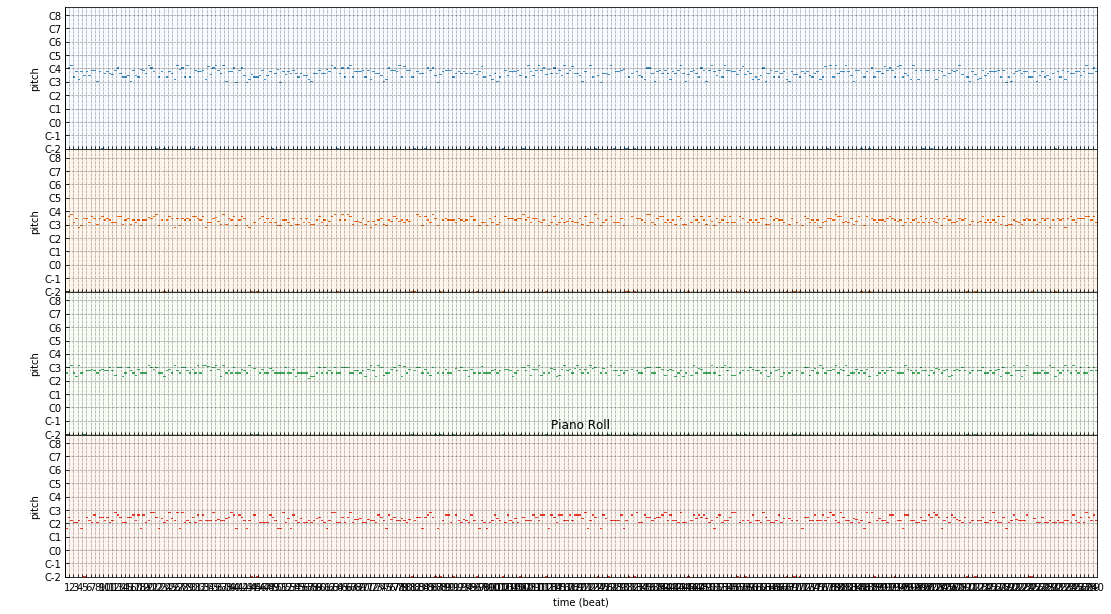

In [730]:
fig , axs = another_multitrack.plot()
fig.set_size_inches(18.5, 10.5)
plt.title("Piano Roll")
plt.show()

In [1]:
!pip install midi2audio

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import os
os.getcwd()

'C:\\Users\\gunay.eser\\Desktop\\Belgeler\\Okul\\CMPE58V'

In [ ]:
from midi2audio import FluidSynth
fs = FluidSynth()
fs.midi_to_audio('gen_midi-10.mid', 'wav-output.wav')